In [1]:
%pylab notebook
import matplotlib.pylab as plt
import pandas as pd
import re
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 360)
pd.set_option('display.max_rows', 360)

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/.conda/envs/pmesdr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [14]:
modice_file = '/Users/brodzik/projects/MODICE/data/MASCONS/mascon_areas_by_year.v02.csv'
modice = pd.read_csv(modice_file)
modice.set_index('Year', inplace=True, verify_integrity=True, drop=True)
modice

,NHem_1strike_MODICE_area_km^2,NHem_1strike_MODICE_NS_km^2,NHem_2strike_MODICE_area_km^2,NHem_2strike_MODICE_NS_km^2,NHem_3strike_MODICE_area_km^2,NHem_3strike_MODICE_NS_km^2,Arctic_1strike_MODICE_area_km^2,Arctic_1strike_MODICE_NS_km^2,Arctic_2strike_MODICE_area_km^2,Arctic_2strike_MODICE_NS_km^2,Arctic_3strike_MODICE_area_km^2,Arctic_3strike_MODICE_NS_km^2,Alaskag_1strike_MODICE_area_km^2,Alaskag_1strike_MODICE_NS_km^2,Alaskag_2strike_MODICE_area_km^2,Alaskag_2strike_MODICE_NS_km^2,Alaskag_3strike_MODICE_area_km^2,Alaskag_3strike_MODICE_NS_km^2,Altaigl_1strike_MODICE_area_km^2,Altaigl_1strike_MODICE_NS_km^2,Altaigl_2strike_MODICE_area_km^2,Altaigl_2strike_MODICE_NS_km^2,Altaigl_3strike_MODICE_area_km^2,Altaigl_3strike_MODICE_NS_km^2,Baffing_1strike_MODICE_area_km^2,Baffing_1strike_MODICE_NS_km^2,Baffing_2strike_MODICE_area_km^2,Baffing_2strike_MODICE_NS_km^2,Baffing_3strike_MODICE_area_km^2,Baffing_3strike_MODICE_NS_km^2,Ellesme_1strike_MODICE_area_km^2,Ellesme_1strike_MODICE_NS_km^2,Ellesme_2strike_MODICE_area_km^2,Ellesme_2strike_MODICE_NS_km^2,Ellesme_3strike_MODICE_area_km^2,Ellesme_3strike_MODICE_NS_km^2,FrnJLnd_1strike_MODICE_area_km^2,FrnJLnd_1strike_MODICE_NS_km^2,FrnJLnd_2strike_MODICE_area_km^2,FrnJLnd_2strike_MODICE_NS_km^2,FrnJLnd_3strike_MODICE_area_km^2,FrnJLnd_3strike_MODICE_NS_km^2,Greenland_1strike_MODICE_area_km^2,Greenland_1strike_MODICE_NS_km^2,Greenland_2strike_MODICE_area_km^2,Greenland_2strike_MODICE_NS_km^2,Greenland_3strike_MODICE_area_km^2,Greenland_3strike_MODICE_NS_km^2,HghMtnA_1strike_MODICE_area_km^2,HghMtnA_1strike_MODICE_NS_km^2,HghMtnA_2strike_MODICE_area_km^2,HghMtnA_2strike_MODICE_NS_km^2,HghMtnA_3strike_MODICE_area_km^2,HghMtnA_3strike_MODICE_NS_km^2,Him+Kar_1strike_MODICE_area_km^2,Him+Kar_1strike_MODICE_NS_km^2,Him+Kar_2strike_MODICE_area_km^2,Him+Kar_2strike_MODICE_NS_km^2,Him+Kar_3strike_MODICE_area_km^2,Him+Kar_3strike_MODICE_NS_km^2,Iceland_1strike_MODICE_area_km^2,Iceland_1strike_MODICE_NS_km^2,Iceland_2strike_MODICE_area_km^2,Iceland_2strike_MODICE_NS_km^2,Iceland_3strike_MODICE_area_km^2,Iceland_3strike_MODICE_NS_km^2,NW_Amer_1strike_MODICE_area_km^2,NW_Amer_1strike_MODICE_NS_km^2,NW_Amer_2strike_MODICE_area_km^2,NW_Amer_2strike_MODICE_NS_km^2,NW_Amer_3strike_MODICE_area_km^2,NW_Amer_3strike_MODICE_NS_km^2,Nov_Zem_1strike_MODICE_area_km^2,Nov_Zem_1strike_MODICE_NS_km^2,Nov_Zem_2strike_MODICE_area_km^2,Nov_Zem_2strike_MODICE_NS_km^2,Nov_Zem_3strike_MODICE_area_km^2,Nov_Zem_3strike_MODICE_NS_km^2,Nthasia_1strike_MODICE_area_km^2,Nthasia_1strike_MODICE_NS_km^2,Nthasia_2strike_MODICE_area_km^2,Nthasia_2strike_MODICE_NS_km^2,Nthasia_3strike_MODICE_area_km^2,Nthasia_3strike_MODICE_NS_km^2,Pam+Kun_1strike_MODICE_area_km^2,Pam+Kun_1strike_MODICE_NS_km^2,Pam+Kun_2strike_MODICE_area_km^2,Pam+Kun_2strike_MODICE_NS_km^2,Pam+Kun_3strike_MODICE_area_km^2,Pam+Kun_3strike_MODICE_NS_km^2,Scandin_1strike_MODICE_area_km^2,Scandin_1strike_MODICE_NS_km^2,Scandin_2strike_MODICE_area_km^2,Scandin_2strike_MODICE_NS_km^2,Scandin_3strike_MODICE_area_km^2,Scandin_3strike_MODICE_NS_km^2,Sev_Zem_1strike_MODICE_area_km^2,Sev_Zem_1strike_MODICE_NS_km^2,Sev_Zem_2strike_MODICE_area_km^2,Sev_Zem_2strike_MODICE_NS_km^2,Sev_Zem_3strike_MODICE_area_km^2,Sev_Zem_3strike_MODICE_NS_km^2,Sib+Kam_1strike_MODICE_area_km^2,Sib+Kam_1strike_MODICE_NS_km^2,Sib+Kam_2strike_MODICE_area_km^2,Sib+Kam_2strike_MODICE_NS_km^2,Sib+Kam_3strike_MODICE_area_km^2,Sib+Kam_3strike_MODICE_NS_km^2,Svalbar_1strike_MODICE_area_km^2,Svalbar_1strike_MODICE_NS_km^2,Svalbar_2strike_MODICE_area_km^2,Svalbar_2strike_MODICE_NS_km^2,Svalbar_3strike_MODICE_area_km^2,Svalbar_3strike_MODICE_NS_km^2,Tianshn_1strike_MODICE_area_km^2,Tianshn_1strike_MODICE_NS_km^2,Tianshn_2strike_MODICE_area_km^2,Tianshn_2strike_MODICE_NS_km^2,Tianshn_3strike_MODICE_area_km^2,Tianshn_3strike_MODICE_NS_km^2,Tib+Qil_1strike_MODICE_area_km^2,Tib+Qil_1strike_MODICE_NS_km^2,Tib+Qil_2strike_MODICE_area_km^2,Tib+Qil_2strike_MODICE_NS_km^2,Tib+Qil_3strike_MODICE_area_km^2,Tib+Qil_3s

In [3]:
seaice_file = '/Users/brodzik/projects/MODICE/data/sii/nsidc0051_year_by_month.csv'
seaice = pd.read_csv(seaice_file)
seaice.set_index('Year', inplace=True, verify_integrity=True, drop=True)
seaice.drop([1999], inplace=True)
seaice

,01_total_extent_km2,02_total_extent_km2,03_total_extent_km2,04_total_extent_km2,05_total_extent_km2,06_total_extent_km2,07_total_extent_km2,08_total_extent_km2,09_total_extent_km2,10_total_extent_km2,11_total_extent_km2,12_total_extent_km2,01_total_area_km2,02_total_area_km2,03_total_area_km2,04_total_area_km2,05_total_area_km2,06_total_area_km2,07_total_area_km2,08_total_area_km2,09_total_area_km2,10_total_area_km2,11_total_area_km2,12_total_area_km2,01_laptev_extent_km2,02_laptev_extent_km2,03_laptev_extent_km2,04_laptev_extent_km2,05_laptev_extent_km2,06_laptev_extent_km2,07_laptev_extent_km2,08_laptev_extent_km2,09_laptev_extent_km2,10_laptev_extent_km2,11_laptev_extent_km2,12_laptev_extent_km2,01_laptev_area_km2,02_laptev_area_km2,03_laptev_area_km2,04_laptev_area_km2,05_laptev_area_km2,06_laptev_area_km2,07_laptev_area_km2,08_laptev_area_km2,09_laptev_area_km2,10_laptev_area_km2,11_laptev_area_km2,12_laptev_area_km2,01_kara_extent_km2,02_kara_extent_km2,03_kara_extent_km2,04_kara_extent_km2,05_kara_extent_km2,06_kara_extent_km2,07_kara_extent_km2,08_kara_extent_km2,09_kara_extent_km2,10_kara_extent_km2,11_kara_extent_km2,12_kara_extent_km2,01_kara_area_km2,02_kara_area_km2,03_kara_area_km2,04_kara_area_km2,05_kara_area_km2,06_kara_area_km2,07_kara_area_km2,08_kara_area_km2,09_kara_area_km2,10_kara_area_km2,11_kara_area_km2,12_kara_area_km2,01_eastsiberian_extent_km2,02_eastsiberian_extent_km2,03_eastsiberian_extent_km2,04_eastsiberian_extent_km2,05_eastsiberian_extent_km2,06_eastsiberian_extent_km2,07_eastsiberian_extent_km2,08_eastsiberian_extent_km2,09_eastsiberian_extent_km2,10_eastsiberian_extent_km2,11_eastsiberian_extent_km2,12_eastsiberian_extent_km2,01_eastsiberian_area_km2,02_eastsiberian_area_km2,03_eastsiberian_area_km2,04_eastsiberian_area_km2,05_eastsiberian_area_km2,06_eastsiberian_area_km2,07_eastsiberian_area_km2,08_eastsiberian_area_km2,09_eastsiberian_area_km2,10_eastsiberian_area_km2,11_eastsiberian_area_km2,12_eastsiberian_area_km2,01_stlawrence_extent_km2,02_stlawrence_extent_km2,03_stlawrence_extent_km2,04_stlawrence_extent_km2,05_stlawrence_extent_km2,06_stlawrence_extent_km2,07_stlawrence_extent_km2,08_stlawrence_extent_km2,09_stlawrence_extent_km2,10_stlawrence_extent_km2,11_stlawrence_extent_km2,12_stlawrence_extent_km2,01_stlawrence_area_km2,02_stlawrence_area_km2,03_stlawrence_area_km2,04_stlawrence_area_km2,05_stlawrence_area_km2,06_stlawrence_area_km2,07_stlawrence_area_km2,08_stlawrence_area_km2,09_stlawrence_area_km2,10_stlawrence_area_km2,11_stlawrence_area_km2,12_stlawrence_area_km2,01_hudson_extent_km2,02_hudson_extent_km2,03_hudson_extent_km2,04_hudson_extent_km2,05_hudson_extent_km2,06_hudson_extent_km2,07_hudson_extent_km2,08_hudson_extent_km2,09_hudson_extent_km2,10_hudson_extent_km2,11_hudson_extent_km2,12_hudson_extent_km2,01_hudson_area_km2,02_hudson_area_km2,03_hudson_area_km2,04_hudson_area_km2,05_hudson_area_km2,06_hudson_area_km2,07_hudson_area_km2,08_hudson_area_km2,09_hudson_area_km2,10_hudson_area_km2,11_hudson_area_km2,12_hudson_area_km2,01_baffin_extent_km2,02_baffin_extent_km2,03_baffin_extent_km2,04_baffin_extent_km2,05_baffin_extent_km2,06_baffin_extent_km2,07_baffin_extent_km2,08_baffin_extent_km2,09_baffin_extent_km2,10_baffin_extent_km2,11_baffin_extent_km2,12_baffin_extent_km2,01_baffin_area_km2,02_baffin_area_km2,03_baffin_area_km2,04_baffin_area_km2,05_baffin_area_km2,06_baffin_area_km2,07_baffin_area_km2,08_baffin_area_km2,09_baffin_area_km2,10_baffin_area_km2,11_baffin_area_km2,12_baffin_area_km2,01_bering_extent_km2,02_bering_extent_km2,03_bering_extent_km2,04_bering_extent_km2,05_bering_extent_km2,06_bering_extent_km2,07_bering_extent_km2,08_bering_extent_km2,09_bering_extent_km2,10_bering_extent_km2,11_bering_extent_km2,12_bering_extent_km2,01_bering_area_km2,02_bering_area_km2,03_bering_area_km2,04_bering_area_km2,05_bering_area_km2,06_bering_area_km2,07_bering_area_km2,08_bering_area_km2,09_bering_area_km2,10_bering_area_km2,11_bering_area_km2,12_bering_

In [8]:
# Calculate residuals
# Subtract the column mean from every element in both Data Frames
# QUESTION:  should these be normalized to a Z-score by dividing by the stdev??
modice_res = modice - modice.mean()
seaice_res = seaice - seaice.mean()

In [15]:
modice_res

,NHem_1strike_MODICE_area_km^2,NHem_1strike_MODICE_NS_km^2,NHem_2strike_MODICE_area_km^2,NHem_2strike_MODICE_NS_km^2,NHem_3strike_MODICE_area_km^2,NHem_3strike_MODICE_NS_km^2,Arctic_1strike_MODICE_area_km^2,Arctic_1strike_MODICE_NS_km^2,Arctic_2strike_MODICE_area_km^2,Arctic_2strike_MODICE_NS_km^2,Arctic_3strike_MODICE_area_km^2,Arctic_3strike_MODICE_NS_km^2,Alaskag_1strike_MODICE_area_km^2,Alaskag_1strike_MODICE_NS_km^2,Alaskag_2strike_MODICE_area_km^2,Alaskag_2strike_MODICE_NS_km^2,Alaskag_3strike_MODICE_area_km^2,Alaskag_3strike_MODICE_NS_km^2,Altaigl_1strike_MODICE_area_km^2,Altaigl_1strike_MODICE_NS_km^2,Altaigl_2strike_MODICE_area_km^2,Altaigl_2strike_MODICE_NS_km^2,Altaigl_3strike_MODICE_area_km^2,Altaigl_3strike_MODICE_NS_km^2,Baffing_1strike_MODICE_area_km^2,Baffing_1strike_MODICE_NS_km^2,Baffing_2strike_MODICE_area_km^2,Baffing_2strike_MODICE_NS_km^2,Baffing_3strike_MODICE_area_km^2,Baffing_3strike_MODICE_NS_km^2,Ellesme_1strike_MODICE_area_km^2,Ellesme_1strike_MODICE_NS_km^2,Ellesme_2strike_MODICE_area_km^2,Ellesme_2strike_MODICE_NS_km^2,Ellesme_3strike_MODICE_area_km^2,Ellesme_3strike_MODICE_NS_km^2,FrnJLnd_1strike_MODICE_area_km^2,FrnJLnd_1strike_MODICE_NS_km^2,FrnJLnd_2strike_MODICE_area_km^2,FrnJLnd_2strike_MODICE_NS_km^2,FrnJLnd_3strike_MODICE_area_km^2,FrnJLnd_3strike_MODICE_NS_km^2,Greenland_1strike_MODICE_area_km^2,Greenland_1strike_MODICE_NS_km^2,Greenland_2strike_MODICE_area_km^2,Greenland_2strike_MODICE_NS_km^2,Greenland_3strike_MODICE_area_km^2,Greenland_3strike_MODICE_NS_km^2,HghMtnA_1strike_MODICE_area_km^2,HghMtnA_1strike_MODICE_NS_km^2,HghMtnA_2strike_MODICE_area_km^2,HghMtnA_2strike_MODICE_NS_km^2,HghMtnA_3strike_MODICE_area_km^2,HghMtnA_3strike_MODICE_NS_km^2,Him+Kar_1strike_MODICE_area_km^2,Him+Kar_1strike_MODICE_NS_km^2,Him+Kar_2strike_MODICE_area_km^2,Him+Kar_2strike_MODICE_NS_km^2,Him+Kar_3strike_MODICE_area_km^2,Him+Kar_3strike_MODICE_NS_km^2,Iceland_1strike_MODICE_area_km^2,Iceland_1strike_MODICE_NS_km^2,Iceland_2strike_MODICE_area_km^2,Iceland_2strike_MODICE_NS_km^2,Iceland_3strike_MODICE_area_km^2,Iceland_3strike_MODICE_NS_km^2,NW_Amer_1strike_MODICE_area_km^2,NW_Amer_1strike_MODICE_NS_km^2,NW_Amer_2strike_MODICE_area_km^2,NW_Amer_2strike_MODICE_NS_km^2,NW_Amer_3strike_MODICE_area_km^2,NW_Amer_3strike_MODICE_NS_km^2,Nov_Zem_1strike_MODICE_area_km^2,Nov_Zem_1strike_MODICE_NS_km^2,Nov_Zem_2strike_MODICE_area_km^2,Nov_Zem_2strike_MODICE_NS_km^2,Nov_Zem_3strike_MODICE_area_km^2,Nov_Zem_3strike_MODICE_NS_km^2,Nthasia_1strike_MODICE_area_km^2,Nthasia_1strike_MODICE_NS_km^2,Nthasia_2strike_MODICE_area_km^2,Nthasia_2strike_MODICE_NS_km^2,Nthasia_3strike_MODICE_area_km^2,Nthasia_3strike_MODICE_NS_km^2,Pam+Kun_1strike_MODICE_area_km^2,Pam+Kun_1strike_MODICE_NS_km^2,Pam+Kun_2strike_MODICE_area_km^2,Pam+Kun_2strike_MODICE_NS_km^2,Pam+Kun_3strike_MODICE_area_km^2,Pam+Kun_3strike_MODICE_NS_km^2,Scandin_1strike_MODICE_area_km^2,Scandin_1strike_MODICE_NS_km^2,Scandin_2strike_MODICE_area_km^2,Scandin_2strike_MODICE_NS_km^2,Scandin_3strike_MODICE_area_km^2,Scandin_3strike_MODICE_NS_km^2,Sev_Zem_1strike_MODICE_area_km^2,Sev_Zem_1strike_MODICE_NS_km^2,Sev_Zem_2strike_MODICE_area_km^2,Sev_Zem_2strike_MODICE_NS_km^2,Sev_Zem_3strike_MODICE_area_km^2,Sev_Zem_3strike_MODICE_NS_km^2,Sib+Kam_1strike_MODICE_area_km^2,Sib+Kam_1strike_MODICE_NS_km^2,Sib+Kam_2strike_MODICE_area_km^2,Sib+Kam_2strike_MODICE_NS_km^2,Sib+Kam_3strike_MODICE_area_km^2,Sib+Kam_3strike_MODICE_NS_km^2,Svalbar_1strike_MODICE_area_km^2,Svalbar_1strike_MODICE_NS_km^2,Svalbar_2strike_MODICE_area_km^2,Svalbar_2strike_MODICE_NS_km^2,Svalbar_3strike_MODICE_area_km^2,Svalbar_3strike_MODICE_NS_km^2,Tianshn_1strike_MODICE_area_km^2,Tianshn_1strike_MODICE_NS_km^2,Tianshn_2strike_MODICE_area_km^2,Tianshn_2strike_MODICE_NS_km^2,Tianshn_3strike_MODICE_area_km^2,Tianshn_3strike_MODICE_NS_km^2,Tib+Qil_1strike_MODICE_area_km^2,Tib+Qil_1strike_MODICE_NS_km^2,Tib+Qil_2strike_MODICE_area_km^2,Tib+Qil_2strike_MODICE_NS_km^2,Tib+Qil_3strike_MODICE_area_km^2,Tib+Qil_3s

In [16]:
seaice_res

,01_total_extent_km2,02_total_extent_km2,03_total_extent_km2,04_total_extent_km2,05_total_extent_km2,06_total_extent_km2,07_total_extent_km2,08_total_extent_km2,09_total_extent_km2,10_total_extent_km2,11_total_extent_km2,12_total_extent_km2,01_total_area_km2,02_total_area_km2,03_total_area_km2,04_total_area_km2,05_total_area_km2,06_total_area_km2,07_total_area_km2,08_total_area_km2,09_total_area_km2,10_total_area_km2,11_total_area_km2,12_total_area_km2,01_laptev_extent_km2,02_laptev_extent_km2,03_laptev_extent_km2,04_laptev_extent_km2,05_laptev_extent_km2,06_laptev_extent_km2,07_laptev_extent_km2,08_laptev_extent_km2,09_laptev_extent_km2,10_laptev_extent_km2,11_laptev_extent_km2,12_laptev_extent_km2,01_laptev_area_km2,02_laptev_area_km2,03_laptev_area_km2,04_laptev_area_km2,05_laptev_area_km2,06_laptev_area_km2,07_laptev_area_km2,08_laptev_area_km2,09_laptev_area_km2,10_laptev_area_km2,11_laptev_area_km2,12_laptev_area_km2,01_kara_extent_km2,02_kara_extent_km2,03_kara_extent_km2,04_kara_extent_km2,05_kara_extent_km2,06_kara_extent_km2,07_kara_extent_km2,08_kara_extent_km2,09_kara_extent_km2,10_kara_extent_km2,11_kara_extent_km2,12_kara_extent_km2,01_kara_area_km2,02_kara_area_km2,03_kara_area_km2,04_kara_area_km2,05_kara_area_km2,06_kara_area_km2,07_kara_area_km2,08_kara_area_km2,09_kara_area_km2,10_kara_area_km2,11_kara_area_km2,12_kara_area_km2,01_eastsiberian_extent_km2,02_eastsiberian_extent_km2,03_eastsiberian_extent_km2,04_eastsiberian_extent_km2,05_eastsiberian_extent_km2,06_eastsiberian_extent_km2,07_eastsiberian_extent_km2,08_eastsiberian_extent_km2,09_eastsiberian_extent_km2,10_eastsiberian_extent_km2,11_eastsiberian_extent_km2,12_eastsiberian_extent_km2,01_eastsiberian_area_km2,02_eastsiberian_area_km2,03_eastsiberian_area_km2,04_eastsiberian_area_km2,05_eastsiberian_area_km2,06_eastsiberian_area_km2,07_eastsiberian_area_km2,08_eastsiberian_area_km2,09_eastsiberian_area_km2,10_eastsiberian_area_km2,11_eastsiberian_area_km2,12_eastsiberian_area_km2,01_stlawrence_extent_km2,02_stlawrence_extent_km2,03_stlawrence_extent_km2,04_stlawrence_extent_km2,05_stlawrence_extent_km2,06_stlawrence_extent_km2,07_stlawrence_extent_km2,08_stlawrence_extent_km2,09_stlawrence_extent_km2,10_stlawrence_extent_km2,11_stlawrence_extent_km2,12_stlawrence_extent_km2,01_stlawrence_area_km2,02_stlawrence_area_km2,03_stlawrence_area_km2,04_stlawrence_area_km2,05_stlawrence_area_km2,06_stlawrence_area_km2,07_stlawrence_area_km2,08_stlawrence_area_km2,09_stlawrence_area_km2,10_stlawrence_area_km2,11_stlawrence_area_km2,12_stlawrence_area_km2,01_hudson_extent_km2,02_hudson_extent_km2,03_hudson_extent_km2,04_hudson_extent_km2,05_hudson_extent_km2,06_hudson_extent_km2,07_hudson_extent_km2,08_hudson_extent_km2,09_hudson_extent_km2,10_hudson_extent_km2,11_hudson_extent_km2,12_hudson_extent_km2,01_hudson_area_km2,02_hudson_area_km2,03_hudson_area_km2,04_hudson_area_km2,05_hudson_area_km2,06_hudson_area_km2,07_hudson_area_km2,08_hudson_area_km2,09_hudson_area_km2,10_hudson_area_km2,11_hudson_area_km2,12_hudson_area_km2,01_baffin_extent_km2,02_baffin_extent_km2,03_baffin_extent_km2,04_baffin_extent_km2,05_baffin_extent_km2,06_baffin_extent_km2,07_baffin_extent_km2,08_baffin_extent_km2,09_baffin_extent_km2,10_baffin_extent_km2,11_baffin_extent_km2,12_baffin_extent_km2,01_baffin_area_km2,02_baffin_area_km2,03_baffin_area_km2,04_baffin_area_km2,05_baffin_area_km2,06_baffin_area_km2,07_baffin_area_km2,08_baffin_area_km2,09_baffin_area_km2,10_baffin_area_km2,11_baffin_area_km2,12_baffin_area_km2,01_bering_extent_km2,02_bering_extent_km2,03_bering_extent_km2,04_bering_extent_km2,05_bering_extent_km2,06_bering_extent_km2,07_bering_extent_km2,08_bering_extent_km2,09_bering_extent_km2,10_bering_extent_km2,11_bering_extent_km2,12_bering_extent_km2,01_bering_area_km2,02_bering_area_km2,03_bering_area_km2,04_bering_area_km2,05_bering_area_km2,06_bering_area_km2,07_bering_area_km2,08_bering_area_km2,09_bering_area_km2,10_bering_area_km2,11_bering_area_km2,12_bering_

In [12]:
modice_res["FrnJLnd_1strike_MODICE_area_km^2"]

Year
2000     239.20625
2001      11.70625
2002     140.20625
2003     119.40625
2004     -68.59375
2005      12.10625
2006      95.60625
2007      79.30625
2008   -1022.59375
2009     230.80625
2010      50.30625
2011      64.90625
2012     100.30625
2013    -157.49375
2014     261.90625
2015    -157.09375
Name: FrnJLnd_1strike_MODICE_area_km^2, dtype: float64

In [17]:
# Get a list of all Arctic ocean areas (these will be grouped together in the graphics)
seaice.columns
p = re.compile(r'01_(.*)')
ocean_region_labels = [p.search(col).group(1) for col in seaice.columns if p.search(col)]
ocean_region_labels

['total_extent_km2',
 'total_area_km2',
 'laptev_extent_km2',
 'laptev_area_km2',
 'kara_extent_km2',
 'kara_area_km2',
 'eastsiberian_extent_km2',
 'eastsiberian_area_km2',
 'stlawrence_extent_km2',
 'stlawrence_area_km2',
 'hudson_extent_km2',
 'hudson_area_km2',
 'baffin_extent_km2',
 'baffin_area_km2',
 'bering_extent_km2',
 'bering_area_km2',
 'centralarctic_extent_km2',
 'centralarctic_area_km2',
 'canadianarchipelago_extent_km2',
 'canadianarchipelago_area_km2',
 'beaufort_extent_km2',
 'beaufort_area_km2',
 'greenland_extent_km2',
 'greenland_area_km2',
 'okhotsk_extent_km2',
 'okhotsk_area_km2',
 'barents_extent_km2',
 'barents_area_km2',
 'chukchi_extent_km2',
 'chukchi_area_km2']

In [18]:
# Get a list of all MASCON areas (these will be rows in the display graphic)
modice.columns
p = re.compile(r'(.+_1strike_MODICE_area_km\^2)')
mascon_labels1 = [p.search(col).group(1) for col in modice.columns if p.search(col)]
mascon_labels1

['NHem_1strike_MODICE_area_km^2',
 'Arctic_1strike_MODICE_area_km^2',
 'Alaskag_1strike_MODICE_area_km^2',
 'Altaigl_1strike_MODICE_area_km^2',
 'Baffing_1strike_MODICE_area_km^2',
 'Ellesme_1strike_MODICE_area_km^2',
 'FrnJLnd_1strike_MODICE_area_km^2',
 'Greenland_1strike_MODICE_area_km^2',
 'HghMtnA_1strike_MODICE_area_km^2',
 'Him+Kar_1strike_MODICE_area_km^2',
 'Iceland_1strike_MODICE_area_km^2',
 'NW_Amer_1strike_MODICE_area_km^2',
 'Nov_Zem_1strike_MODICE_area_km^2',
 'Nthasia_1strike_MODICE_area_km^2',
 'Pam+Kun_1strike_MODICE_area_km^2',
 'Scandin_1strike_MODICE_area_km^2',
 'Sev_Zem_1strike_MODICE_area_km^2',
 'Sib+Kam_1strike_MODICE_area_km^2',
 'Svalbar_1strike_MODICE_area_km^2',
 'Tianshn_1strike_MODICE_area_km^2',
 'Tib+Qil_1strike_MODICE_area_km^2']

In [19]:
p = re.compile(r'(.+)_.strike')
mascons1 = [p.search(label).group(1) for label in mascon_labels1]
mascons1

['NHem',
 'Arctic',
 'Alaskag',
 'Altaigl',
 'Baffing',
 'Ellesme',
 'FrnJLnd',
 'Greenland',
 'HghMtnA',
 'Him+Kar',
 'Iceland',
 'NW_Amer',
 'Nov_Zem',
 'Nthasia',
 'Pam+Kun',
 'Scandin',
 'Sev_Zem',
 'Sib+Kam',
 'Svalbar',
 'Tianshn',
 'Tib+Qil']

In [20]:
def plot_regression(ax, x, y, pthreshold=0.05, following_year=False):
        
    # To use statsmodels, data need to be in a DataFrame
    # Thanks to https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
    # for pointers to statsmodels
    if following_year:
        print("doing following year")
        data = pd.concat([y, x.shift(periods=-1)], axis=1).reset_index()
    else:
        data = pd.concat([y, x], axis=1).reset_index()
        
    data.columns = ['Year', 'y', 'x']
    data.dropna(inplace=True)

    # Calculate OLS regression
    try:
        lm = smf.ols(formula='y ~ x', data=data).fit()
    except ValueError:
        print("Value error in OLS call, skipping this plot")
        ax.text(0.5, 0.5, "No Data", horizontalalignment='center')
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        return
    
    x_new = pd.DataFrame({'x': [data.x.min(), data.x.max()]})
    preds = lm.predict(x_new)
    if lm.pvalues.ix['x'] < pthreshold:
        color = 'r'
        style = '-'
    else:
        color = 'k'
        style = ':'
    
    ax.scatter(x=data.x, y=data.y)
    ax.axhline(y=0.0, color='k', linestyle=":")
    ax.axvline(x=0.0, color='k', linestyle=":")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    ax.plot(x_new, preds, color=color, linestyle=style, linewidth=2)    

Year
2000    86371.03125
2001    31151.43125
2002    17284.63125
2003     2738.53125
2004    26674.23125
2005    -4293.26875
2006    20203.33125
2007    -1873.16875
2008    10317.73125
2009    -4708.16875
2010   -61255.06875
2011   -50051.16875
2012   -16575.56875
2013   -24555.06875
2014    -7541.66875
2015   -23887.76875
Name: NHem_1strike_MODICE_area_km^2, dtype: float64
Year
2000    184243.625
2001    235773.625
2002    148838.625
2003    176647.625
2004    146200.625
2005   -198542.375
2006   -465500.375
2007   -254332.375
2008    172166.625
2009    198896.625
2010    -80579.375
2011   -288084.375
2012     94856.625
2013    -95021.375
2014    -27515.375
2015     51951.625
Name: 01_total_area_km2, dtype: float64


<IPython.core.display.Javascript object>


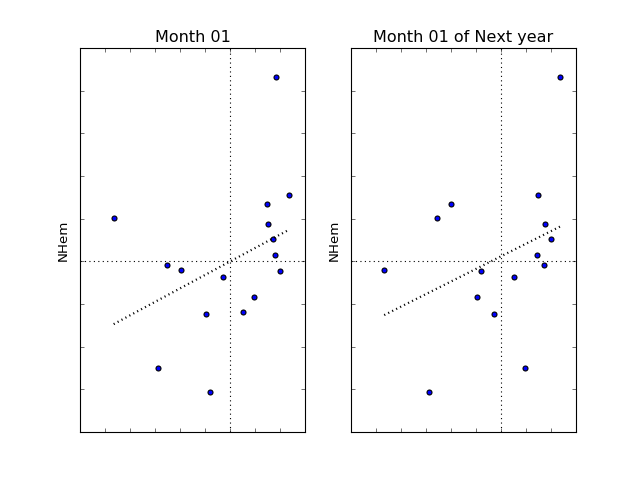

doing following year


In [22]:
my_modice_res = modice_res["NHem_1strike_MODICE_area_km^2"]
print(my_modice_res)
my_seaice_res = seaice_res["01_total_area_km2"]
print(my_seaice_res)
fig, ax = plt.subplots(1, 2)
plot_regression(ax=ax[0], x=my_seaice_res, y=my_modice_res, pthreshold=0.05)
ax[0].set_ylabel('NHem')
ax[0].set_title('Month 01')
plot_regression(ax=ax[1], x=my_seaice_res, y=my_modice_res, following_year=True, pthreshold=0.05)
ax[1].set_ylabel('NHem')
ax[1].set_title('Month 01 of Next year')
#help(ax)

In [23]:
def mascon_list(area='big'):
    if area == 'big':
        return(['NHem', 'Arctic', 'Greenland'])
    elif area == 'arctic':
        return(['Alaskag',
                'NW_Amer',
                'Baffing',
                'Ellesme',
                'FrnJLnd',
                'Iceland',
                'Nov_Zem',
                'Scandin',
                'Sev_Zem',
                'Sib+Kam',
                'Svalbar'])
    elif area == 'hma':
        return(['Altaigl',
                'HghMtnA',
                'Him+Kar',
                'Nthasia',
                'Pam+Kun',
                'Tianshn',
                'Tib+Qil'])

In [ ]:
def do_full_comparison(seaice_variable='total_area_km2', nstrikes=1, pthreshold=0.05):
    print("Next variable=%s" % seaice_variable)
    areas = ['big', 'arctic', 'hma']
    suptitle_offset = [0.9, 0.96, 0.93]
    for area_idx, area in enumerate(areas):
        print("Next area=%s" % area)
        ncols = 24
        cols = np.arange(ncols) + 1
        mascons = mascon_list(area)
        mascon_labels = ["%s_%dstrike_MODICE_area_km^2" % (mascon, nstrikes) for mascon in mascons]
        nmascons = len(mascon_labels)
        scale = 2
        fig, ax = plt.subplots(nmascons, ncols, figsize=(scale*ncols, scale*nmascons))
        fig.suptitle("Seaice (%s) vs. MODICE(%d strike) mascon (p < %04.2f)" % 
                     (seaice_variable, nstrikes, pthreshold), fontsize=16)
        for row, modice_label in enumerate(mascon_labels):
            for col, month_index in enumerate(cols):
                print("row, col = %d, %d" % (row, col))
                if month_index > 12:
                    month = month_index - 12
                else:
                    month = month_index
                column_label = "%02d_%s" % (month, seaice_variable)

                plot_regression(ax=ax[row, col], 
                                x=seaice_res[column_label],
                                y=modice1_res[modice_label],
                                following_year=month_index > 12,
                                pthreshold=pthreshold)
        
                if col==0:
                    ax[row, col].set_ylabel("%s MODICE" % (mascons[row]))
                if row==0:
                    if month_index > 12:
                        ax[row, col].set_title("next %d seaice" % (month))
                    else:
                        ax[row, col].set_title("%d seaice" % (month))

        fig.subplots_adjust(wspace=0, hspace=0)
        #plt.tight_layout()

        # Adjust the final layout so the main title is set right
        fig.subplots_adjust(top=suptitle_offset[area_idx])
        
        fig.savefig("/Users/brodzik/projects/MODICE/data/MASCONS/MODICE1_%s_vs_%s.p%04.2f.png" %
                    (area, seaice_variable, pthreshold))
    
    plt.close('all')

In [ ]:
for ocean_region_label in ocean_region_labels:
    do_full_comparison(seaice_variable=ocean_region_label)